In [140]:
import os
import numpy as np
import pandas as pd
import re

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = 'A_DeviceMotion_data/'

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        category = p.split('/')[-1].split('_')[0]
        parts = p.split("\\")
        subject = parts[-1].split('_')[1].split('.')[0]
        # c_dir, c_file = p.split('/')[-1], p.split('/')[-0]
        # c_cat, c_ses = c_dir.split('_')[-1], c_dir.split('_')[-1]
        #c_sub = c_file.split('_')[-1].split('.')[-2]
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(subject))
        # tdf = tdf.assign(session_id = c_ses)
        tdf = tdf.assign(category = str(category))
        # tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        # tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        # tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        # tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)

1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
3
4
5
6
7
8
9


In [142]:
data_frame.to_csv("motion_data_modified_2.csv")

####### building model #####

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output

In [146]:
import zipfile
import urllib.request
import os

# Step 1: Download and extract the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
dataset_path = 'UCI_HAR_Dataset.zip'

# Download the dataset
urllib.request.urlretrieve(url, dataset_path)

# Unzip the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall()

# Verify the contents of the extracted folder
extracted_folder = 'UCI HAR Dataset/'
print(os.listdir(extracted_folder))

['.DS_Store', 'activity_labels.txt', 'features.txt', 'features_info.txt', 'README.txt', 'test', 'train']


In [148]:
features = pd.read_csv(extracted_folder + 'features.txt', delim_whitespace=True, header=None, names=['index', 'feature'])
feature_names = features['feature'].values

# Make feature names unique by appending indices to duplicates
_, unique_indices = np.unique(feature_names, return_index=True)
if len(unique_indices) < len(feature_names):  # Check for duplicates
    feature_names = [f"{name}_{i}" if list(feature_names).count(name) > 1 else name 
                     for i, name in enumerate(feature_names)]

# Load training data using the modified feature names
X_train = pd.read_csv(extracted_folder + 'train/X_train.txt', delim_whitespace=True, header=None, names=feature_names)
y_train = pd.read_csv(extracted_folder + 'train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])

# Load test data
X_test = pd.read_csv(extracted_folder + 'test/X_test.txt', delim_whitespace=True, header=None, names=feature_names)
y_test = pd.read_csv(extracted_folder + 'test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])

# Combine training and test datasets
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Show the shape of the data
print("Feature data shape:", X.shape)
print("Labels data shape:", y.shape) 

C:\Users\Gopal Bhavsar\AppData\Local\Temp\ipykernel_7444\43618888.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv(extracted_folder + 'features.txt', delim_whitespace=True, header=None, names=['index', 'feature'])
C:\Users\Gopal Bhavsar\AppData\Local\Temp\ipykernel_7444\43618888.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(extracted_folder + 'train/X_train.txt', delim_whitespace=True, header=None, names=feature_names)
C:\Users\Gopal Bhavsar\AppData\Local\Temp\ipykernel_7444\43618888.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(extracted_folder + 'train/y_train.txt', delim_whitespace=True, header=None, names=['Act

Feature data shape: (10299, 561)
Labels data shape: (10299, 1)


C:\Users\Gopal Bhavsar\AppData\Local\Temp\ipykernel_7444\43618888.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(extracted_folder + 'test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])


In [150]:
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

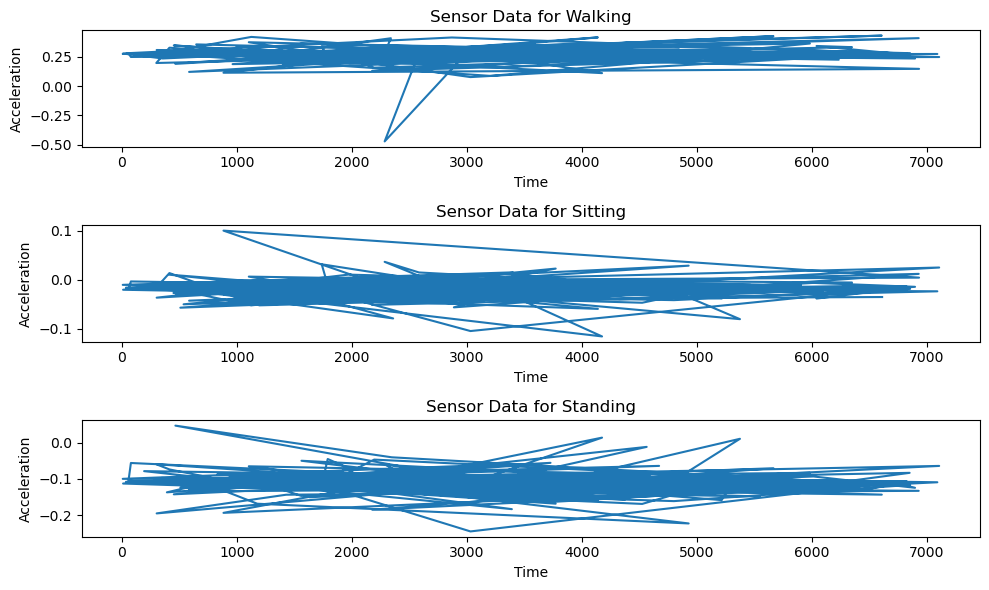

In [152]:
plt.figure(figsize=(10, 6))

# Plot time-series data for 'Walking'
plt.subplot(3, 1, 1)
plt.plot(X_train.iloc[:200, 0], label='Walking Sensor Data')
plt.title('Sensor Data for Walking')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# Plot time-series data for 'Sitting'
plt.subplot(3, 1, 2)
plt.plot(X_train.iloc[:200, 1], label='Sitting Sensor Data')
plt.title('Sensor Data for Sitting')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# Plot time-series data for 'Standing'
plt.subplot(3, 1, 3)
plt.plot(X_train.iloc[:200, 2], label='Standing Sensor Data')
plt.title('Sensor Data for Standing')
plt.xlabel('Time')
plt.ylabel('Acceleration')

plt.tight_layout()
plt.show()

In [154]:
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

C:\Users\Gopal Bhavsar\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           1       0.99      0.99      0.99       369
           2       0.97      0.99      0.98       270
           3       0.99      0.96      0.98       284
           4       0.97      0.95      0.96       377
           5       0.95      0.96      0.96       354
           6       1.00      1.00      1.00       406

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



In [158]:
print(X_train_scaled)

[[ 0.01385973 -0.84497679  0.07520857 ... -0.56747951  0.5881023
   0.33614385]
 [-0.13205641 -0.60512613  1.01334209 ... -0.52284774  0.63324754
   0.38326135]
 [ 0.06899179  0.03615074  0.06300057 ... -0.21596778 -0.7376958
  -0.07056547]
 ...
 [ 0.29658235 -0.01899189 -0.2084583  ... -0.70527414  0.389212
   0.06456774]
 [ 0.09523567 -0.03655275 -0.09140344 ... -0.67210068  0.05499654
  -0.17248729]
 [-0.15725195  0.67991835  0.25895754 ... -0.72811506  0.40451758
   0.20561656]]


In [182]:
default_input = np.zeros((1, 561))  # Initialize the input array, assuming the input has 3 features  # Initialize the input array, assuming the input has 3 features

default_input[0, 0] =  0.28 # Accelerometer X-axis
default_input[0, 1] = 0.28  # Accelerometer Y-axis
default_input[0, 2] = 0.28  # Gyroscope Z-axis

# Scale the input data
input_scaled = scaler.transform(default_input)

# Predict activity
prediction = clf.predict(input_scaled)
prediction_proba = clf.predict_proba(input_scaled)

# Map the predicted number to the activity label
predicted_activity = activity_dict[prediction[0]]

In [184]:
predicted_activity

'WALKING'